In [1]:
from train import learn_model
from agent_distribution import AgentDistribution
from utils import compute_continuity_noise, fixed_point_interpolation_true_distribution, convert_to_unit_vector
from optimal_beta import optimal_beta_expected_policy_loss 
from reparametrized_gradient import plot_total_derivative

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_challenging_agent_dist(n, n_types, d):
    gaming_type_etas = np.random.uniform(3., 5., int(n_types * d/2)).reshape(int(n_types/2), d, 1)
    gaming_type_gamma_one = np.random.uniform(0.01, 0.02, int(n_types/2) ).reshape(int(n_types/2), 1, 1)
    gaming_type_gamma_two = np.random.uniform(10., 20., int(n_types/2)).reshape(int(n_types/2), 1, 1)
    gaming_type_gammas = np.hstack((gaming_type_gamma_one, gaming_type_gamma_two))
    
    natural_type_etas = np.random.uniform(5., 7., int(n_types *d/2)).reshape(int(n_types/2), d, 1)
    natural_type_gammas = np.random.uniform(10., 20., int(n_types * d/2)).reshape(int(n_types/2), d, 1)
    
    etas = np.vstack((gaming_type_etas, natural_type_etas))
    gammas = np.vstack((gaming_type_gammas, natural_type_gammas))
    dic = {"etas": etas, "gammas": gammas}
    agent_dist = AgentDistribution(n=n, d=d, n_types=n_types, types=dic, prop=None)
    return agent_dist

In [3]:
def create_generic_agent_dist(n, n_types, d):
    etas = np.random.uniform(3., 8., n_types * d).reshape(n_types, d, 1)
    gammas = np.random.uniform(0.05, 2., n_types * d).reshape(n_types, d, 1)
    dic = {"etas": etas, "gammas": gammas}
    agent_dist = AgentDistribution(n=n, d=d, n_types=n_types, types=dic, prop=None)
    return agent_dist

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:53<00:00,  1.88it/s]


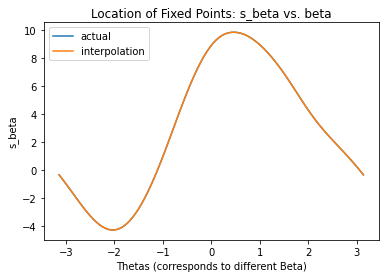

In [4]:
n = 1000
n_types = 10
d = 2
agent_dist = create_challenging_agent_dist(n, n_types, d)
sigma = compute_continuity_noise(agent_dist) 
q = 0.7
f = fixed_point_interpolation_true_distribution(agent_dist, sigma, q, plot=True)

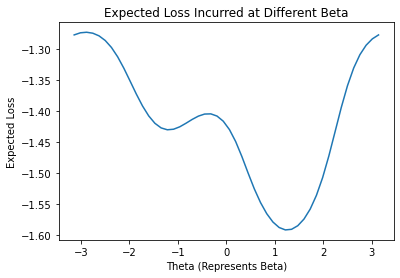

Opt Theta: 1.2181685799633888
Min Loss: -1.5915802242443178


In [5]:
min_loss, opt_beta, opt_s_beta, thetas, losses = optimal_beta_expected_policy_loss(agent_dist, sigma, f, plot=True)
opt_theta = np.arctan2(opt_beta[1], opt_beta[0])
print("Opt Theta: {}".format(opt_theta.item()))
print("Min Loss: {}".format(min_loss))

Text(0, 0.5, 'Count')

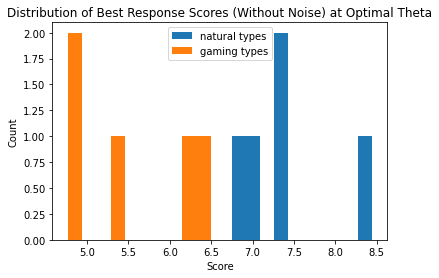

In [9]:
all_br = agent_dist.best_response_score_distribution(opt_beta, opt_s_beta, sigma)
plt.hist(all_br[int(n_types/2):], label="natural types")
plt.hist(all_br[:int(n_types/2)], label="gaming types")
plt.title("Distribution of Best Response Scores (Without Noise) at Optimal Theta")
plt.legend()
plt.xlabel("Score")
plt.ylabel("Count")

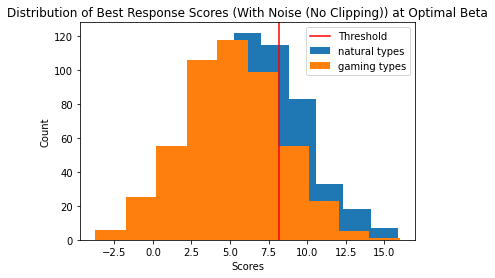

In [10]:
all_br = agent_dist.best_response_noisy_score_distribution(opt_beta, opt_s_beta, sigma)
natural_types_idx = np.where(agent_dist.n_agent_types >= int(n_types/2))
gaming_types_idx = np.where(agent_dist.n_agent_types < int(n_types/2))
plt.hist(all_br[natural_types_idx], label="natural types")
plt.hist(all_br[gaming_types_idx], label="gaming types")
plt.axvline(x=opt_s_beta, c="r", label="Threshold")
plt.title("Distribution of Best Response Scores (With Noise (No Clipping)) at Optimal Beta")
plt.xlabel("Scores")
plt.ylabel("Count")
plt.legend()
plt.legend()

Text(0, 0.5, 'Count')

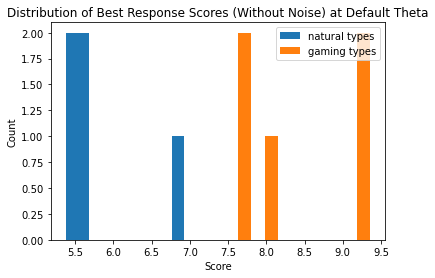

In [12]:
default_theta = 0.
default_beta = convert_to_unit_vector(default_theta)
default_s_beta = f(default_theta)
all_br = agent_dist.best_response_score_distribution(default_beta, default_s_beta, sigma)
plt.hist(all_br[int(n_types/2):], label="natural types")
plt.hist(all_br[:int(n_types/2)], label="gaming types")
plt.title("Distribution of Best Response Scores (Without Noise) at Default Theta")
plt.legend()
plt.xlabel("Score")
plt.ylabel("Count")

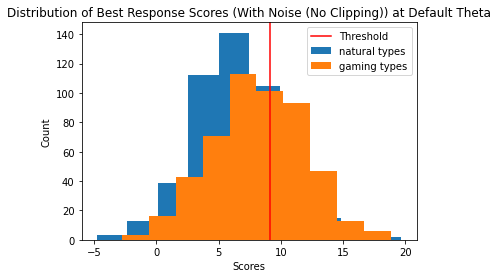

In [73]:
all_br = agent_dist.best_response_noisy_score_distribution(default_beta, default_s_beta, sigma)
natural_types_idx = np.where(agent_dist.n_agent_types >= int(n_types/2))
gaming_types_idx = np.where(agent_dist.n_agent_types < int(n_types/2))
plt.hist(all_br[natural_types_idx], label="natural types")
plt.hist(all_br[gaming_types_idx], label="gaming types")
plt.axvline(x=default_s_beta, c="r", label="Threshold")
plt.title("Distribution of Best Response Scores (With Noise (No Clipping)) at Default Theta")
plt.xlabel("Scores")
plt.ylabel("Count")
plt.legend()